In [1]:
from pySEOBNREPHM.waveform import calculate_waveform_ep 
from pySEOBNREPHM.detector import GWDetector
import matplotlib.pyplot as plt
import numpy as np
from lal import MTSUN_SI
from pycbc.waveform import get_td_waveform

/tmp/ipykernel_338404/1082205546.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import MTSUN_SI


lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


In [2]:
m1 = m2 = 10
chi1x = 0.2
chi1y = chi1z = 0
chi2y = -0.3
chi2x = chi2z = 0
e0 = 0.2
dL = 100
zeta_rad = 0
iota_rad = beta_rad = Phic_rad = 0
fMin = 20
Mf_ref = 20 * (m1 + m2) * MTSUN_SI
waveform, dynamics = calculate_waveform_ep(
    (
        m1,
        m2,
        chi1x,
        chi1y,
        chi1z,
        chi2x,
        chi2y,
        chi2z,
        e0,
        dL,
        zeta_rad,
        iota_rad,
        beta_rad,
        Phic_rad,
    ),
    fMin,
    Mf_ref=Mf_ref,
    srate=16384,
    is_coframe=False,
)

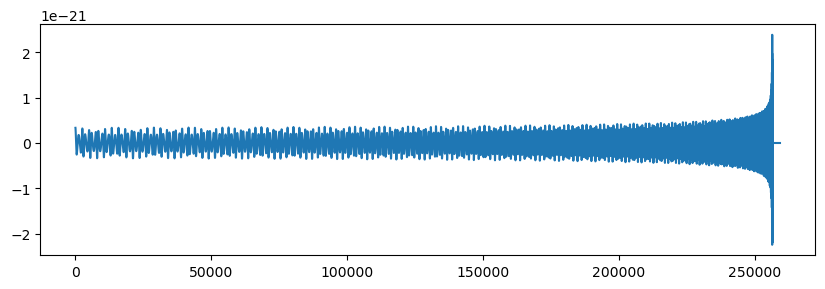

In [12]:
plt.figure(figsize=(10,3))
plt.plot(waveform.hpc.real)

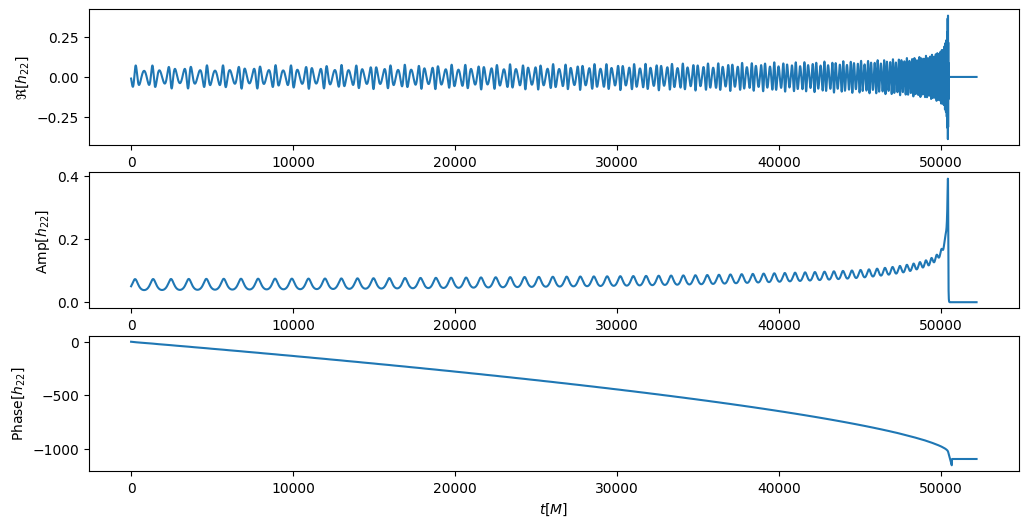

In [3]:
h22 = waveform.h22
fig = plt.figure(figsize = (12, 6))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(h22.time, h22.real)
ax1.set_ylabel(r'$\Re[h_{22}]$')

ax2.plot(h22.time, h22.amp)
ax2.set_ylabel(r'${\rm Amp}[h_{22}]$')

ax3.plot(h22.time, h22.phase)
ax3.set_ylabel(r'${\rm Phase}[h_{22}]$')

ax3.set_xlabel(r'$t[M]$')
plt.show()

In [6]:
det_L1 = GWDetector('L1')

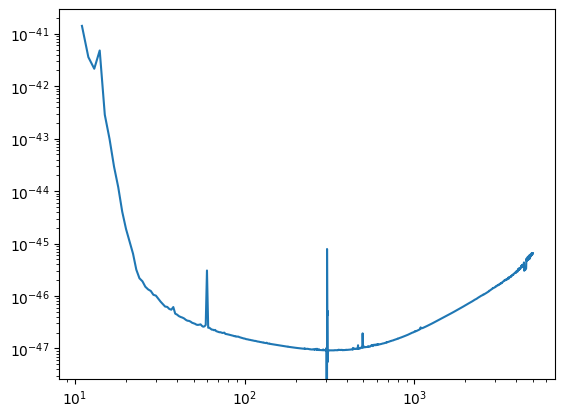

In [11]:
freq = np.linspace(0, 8192, 8193, endpoint=True)
plt.loglog(det_L1(freq))

In [5]:
hp, hc = get_td_waveform(
    approximant="SEOBNREPHM",
    mass1=m1,
    mass2=m2,
    spin1x=chi1x,
    spin1y=chi1y,
    spin1z=chi1z,
    spin2x=chi2x,
    spin2y=chi2y,
    spin2z=chi2z,
    eccentricity=e0,
    distance=dL,
    rel_anomaly=zeta_rad,
    inclination=iota_rad,
    coa_phase=Phic_rad,
    delta_t=1.0/16384,
    f_lower=fMin,
)

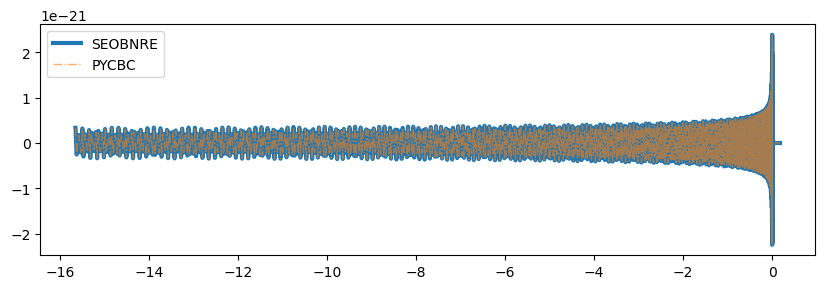

In [18]:
plt.figure(figsize=(10,3))
t = waveform.time - waveform.hpc.time[waveform.hpc.argpeak]
plt.plot(t, waveform.hpc.real, lw=3)
plt.plot(hp.sample_times, hp,ls="-.", lw=1, alpha=0.6)
plt.legend(["SEOBNRE", "PYCBC"])


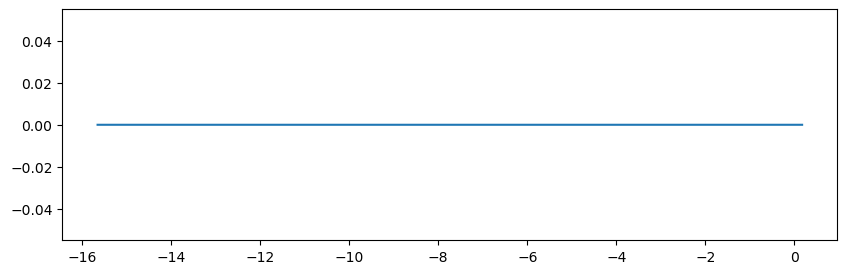

In [14]:
plt.figure(figsize=(10,3))
t = waveform.time - waveform.hpc.time[waveform.hpc.argpeak]
plt.plot(t, waveform.hpc.real - hp)
# plt.plot(hp.sample_times, hp,ls="--")
# plt.legend(["SEOBNRE", "PYCBC"])

In [3]:
hp, hc = get_td_waveform(
    approximant="SEOBNREPHM",
    mass1=m1,
    mass2=m2,
    spin1x=0.9,
    spin1y=0.8,
    spin1z=0.7,
    spin2x=0.8,
    spin2y=0.8,
    spin2z=0.95,
    eccentricity=e0,
    distance=dL,
    rel_anomaly=zeta_rad,
    inclination=iota_rad,
    coa_phase=Phic_rad,
    delta_t=1.0/16384,
    f_lower=fMin,
)

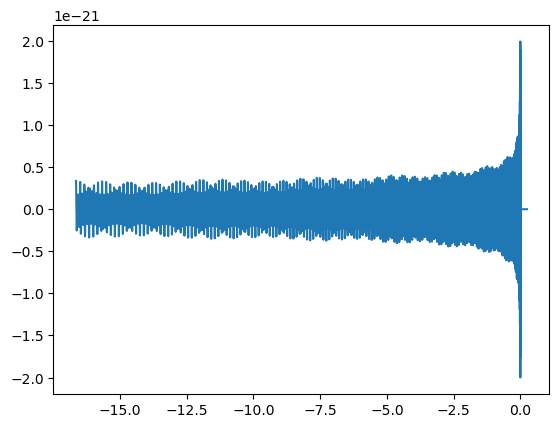

In [5]:
t = waveform.time - waveform.hpc.time[waveform.hpc.argpeak]
plt.plot(hp.sample_times, hp,)